In [1]:
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mat_contents = io.loadmat('summaries.mat', squeeze_me=True)

C:\Users\mushe\anaconda3\lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [3]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'G', 'None', 'dataset_path', 'deck', 'fluid', 'i', 'idx', 'itCounts', 'itCountsRegression', 'j', 'niters', 'numBackward', 'numRealizations', 'numToSkip', 'pressure_norm', 'relCounts', 'relCountsExtrapolate', 'relCountsRegression', 'report', 'report_path', 'rock', 'sat_wat_norm', 'schedule', 'sim_time', 'sol_path', 'state', 'statesSol', 'summaries', 'summary', 'summary_path', 'table_summary', 'timeline', '__function_workspace__'])

In [4]:
summaries = mat_contents['summaries']

In [5]:
summaries[0].dtype

dtype([('itCount', 'O'), ('pressure_norm', 'O'), ('sat_wat_norm', 'O'), ('sat_oil_norm', 'O'), ('sim_time', 'O')])

In [6]:
timeline = np.arange(2, 122)
pressure_const = 1e-3*np.array(summaries[0]['pressure_norm'], dtype='double')
pressure_extr = 1e-3*np.array(summaries[1]['pressure_norm'], dtype='double')
pressure_regr = 1e-3*np.array(summaries[2]['pressure_norm'], dtype='double')
pressure_3 = 1e-3*np.array(summaries[3]['pressure_norm'], dtype='double')
pressure_4 = 1e-3*np.array(summaries[4]['pressure_norm'], dtype='double')


sat_wat_const = np.array(summaries[0]['sat_wat_norm'], dtype='double')
sat_wat_extr = np.array(summaries[1]['sat_wat_norm'], dtype='double')
sat_wat_regr = np.array(summaries[2]['sat_wat_norm'], dtype='double')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


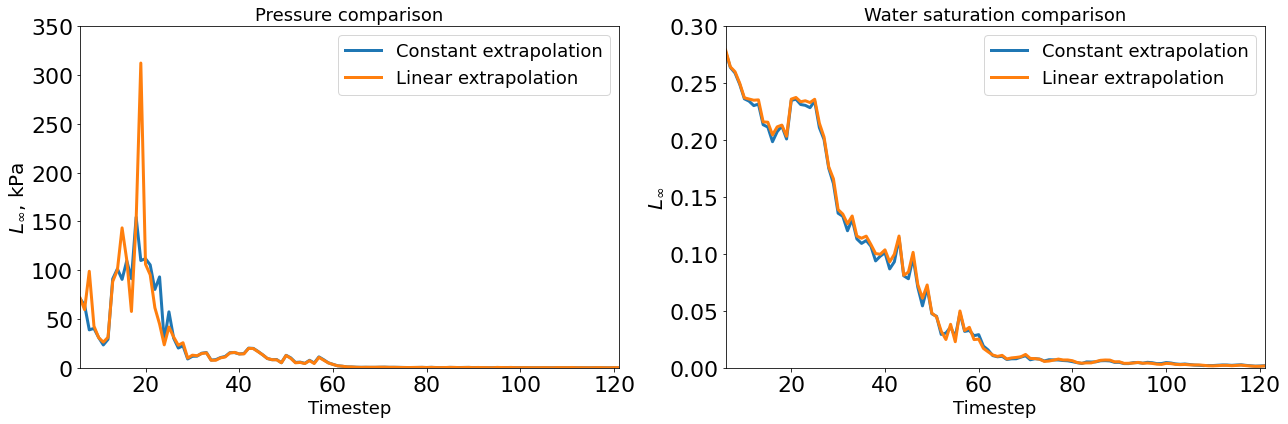

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.set_title('Pressure comparison', fontsize=18)
ax1.set_xlabel('Timestep', fontsize=18)
ax1.set_ylabel('$L_{\infty}$, kPa', fontsize=20)
ax1.set_xlim(6, 121)
ax1.set_ylim(0, 350)
plt.setp(ax1.get_xticklabels(), fontsize = 22)
plt.setp(ax1.get_yticklabels(), fontsize = 22)

#ax1.plot(timeline, pressure_const, linewidth=3.0)
ax1.plot(timeline, pressure_extr, linewidth=3.0)
ax1.plot(timeline, pressure_regr, linewidth=3.0)

#ax1.plot(timeline, pressure_3, linewidth=3.0)
#ax1.plot(timeline, pressure_4, linewidth=3.0)


ax1.legend(['Constant extrapolation', 'Linear extrapolation', 'Simple linear regression', 'Three diffs', 'Four diffs'], fontsize=18)

ax2.set_title('Water saturation comparison', fontsize=18)
#ax2.plot(timeline, sat_wat_const, linewidth=3.0)
ax2.plot(timeline, sat_wat_extr, linewidth=3.0)
ax2.plot(timeline, sat_wat_regr, linewidth=3.0)
ax2.set_xlim(6, 121)
ax2.set_ylim(0, 0.3)
plt.setp(ax2.get_xticklabels(), fontsize = 22)
plt.setp(ax2.get_yticklabels(), fontsize = 22)
ax2.set_xlabel('Timestep', fontsize=18)
ax2.set_ylabel('$L_{\infty}$', fontsize=20)
ax2.legend(['Constant extrapolation', 'Linear extrapolation', 'Simple linear regression'], fontsize=18)

fig.tight_layout()

plt.savefig("norm_guess_solution.pdf", format="eps", bbox_inches = 'tight')

In [8]:
max(pressure_regr[5:])

312.434624369435

In [9]:
np.argmax(pressure_regr[5:])

12

In [10]:
pressure_regr[17]

312.434624369435

In [11]:
mat_contents = io.loadmat('relCountsExtrapolate.mat', squeeze_me=True)

C:\Users\mushe\anaconda3\lib\site-packages\scipy\io\matlab\_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [12]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'G', 'ans', 'None', 'dataset_path', 'deck', 'fluid', 'i', 'idx', 'itCounts', 'itCountsRegression', 'j', 'niters', 'numBackward', 'numRealizations', 'numToSkip', 'pressure_norm', 'relCounts', 'relCountsExtrapolate', 'relCountsRegression', 'report', 'report_path', 'rock', 'sat_wat_norm', 'schedule', 'sim_time', 'sol_path', 'state', 'statesSol', 'summaries', 'summary', 'summary_path', 'table_summary', 'timeline', '__function_workspace__'])

In [13]:
relCountsExtrapolate = mat_contents['relCountsExtrapolate']

In [14]:
relCountsRegression = mat_contents['relCountsRegression']

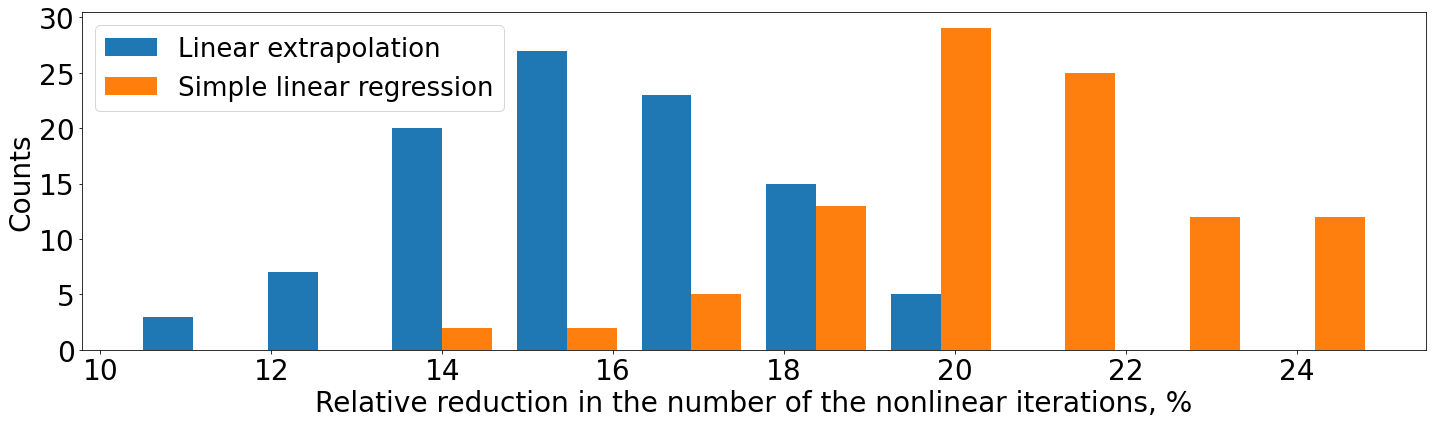

In [15]:
n_bins = 10

fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize = (20, 6))

# We can set the number of bins with the *bins* keyword argument.
ax.hist([relCountsExtrapolate, relCountsRegression])#, bins=n_bins);
ax.set_xlabel('Relative reduction in the number of the nonlinear iterations, %', fontsize=28)
ax.set_ylabel('Counts', fontsize=28)
plt.setp(ax.get_xticklabels(), fontsize = 28)
plt.setp(ax.get_yticklabels(), fontsize = 28)

ax.legend(['Linear extrapolation', 'Simple linear regression'], fontsize=26)
plt.savefig("histogram.pdf", format="pdf", bbox_inches = 'tight')

In [16]:
np.mean(relCountsExtrapolate)

15.792404808221198

In [17]:
np.mean(relCountsRegression)

20.578709148441995

In [18]:
mat_contents = io.loadmat('coeff_researchsummary_2.mat', squeeze_me=True)

In [19]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'summary'])

In [20]:
coeffs = mat_contents['summary']

In [21]:
coeffs = coeffs[6:]['coeffs']

In [22]:
coeffs = np.array(list(coeffs))

In [23]:
coeffs_pressure = coeffs[:, 0]
coeffs_sat_wat = coeffs[:, 1]

In [24]:
timeline

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121])

In [25]:
timeline[5:]

array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121])

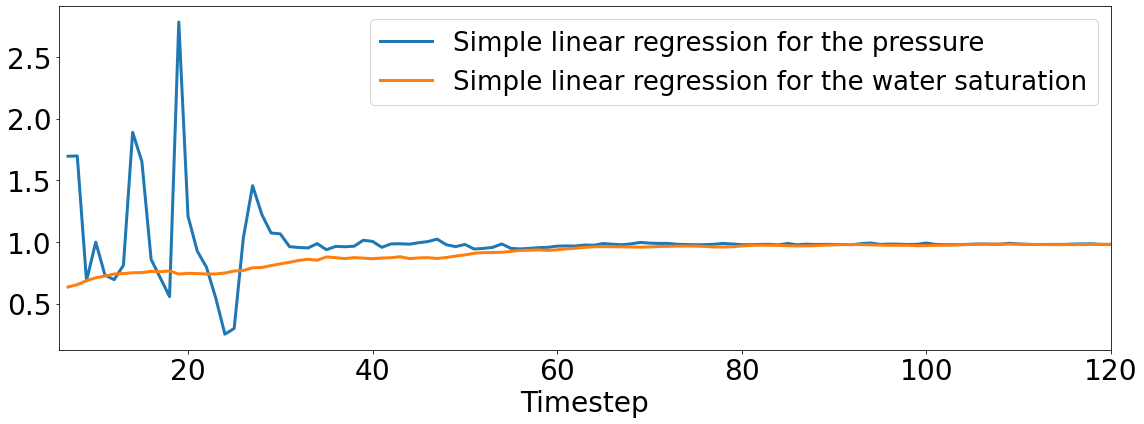

In [26]:
fig, ax = plt.subplots(figsize=(16, 6))

#ax.set_title('Linear regression coefficient change', fontsize=28)
ax.set_xlabel('Timestep', fontsize=28)
ax.set_xlim(6, 120)
#ax.set_ylim(0, 330)
plt.setp(ax.get_xticklabels(), fontsize = 28)
plt.setp(ax.get_yticklabels(), fontsize = 28)

ax.plot(timeline[5:], coeffs_pressure, linewidth=3.0)
ax.plot(timeline[5:], coeffs_sat_wat, linewidth=3.0)

ax.legend(['Simple linear regression for the pressure', 'Simple linear regression for the water saturation'], fontsize=26)

fig.tight_layout()

plt.savefig("coeffs.pdf", format="pdf", bbox_inches = 'tight')

In [27]:
coeffs_pressure.shape

(115,)

In [28]:
linextrapolate_iters = summaries[1]['itCount'][5:]
linregression_iters = summaries[2]['itCount'][5:]

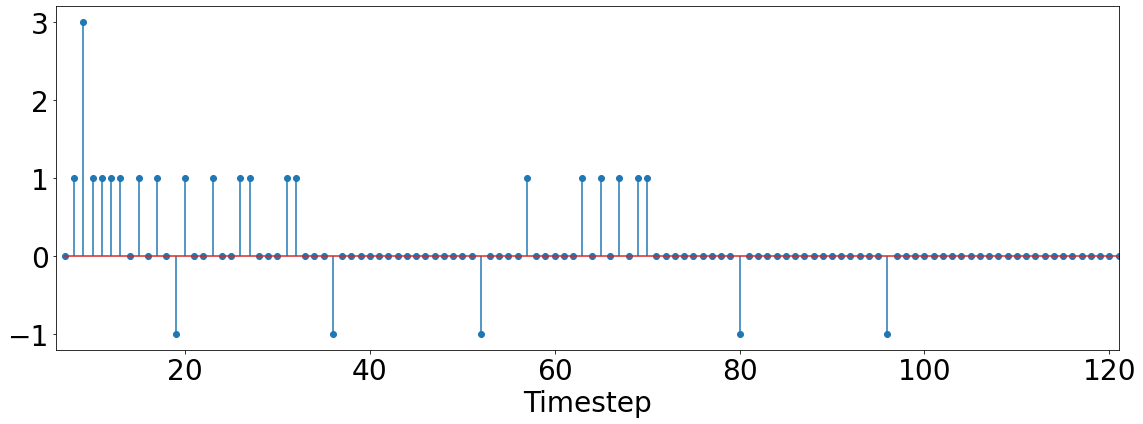

In [29]:
fig, ax = plt.subplots(figsize=(16, 6))

#ax.set_title('Iterations', fontsize=28)
ax.set_xlabel('Timestep', fontsize=28)
ax.set_xlim(6, 121)
#ax.set_ylim(0, 330)
ax.set_yticks([-1, 1, 0, 2, 3])
#twin1 = ax.twinx()

plt.setp(ax.get_xticklabels(), fontsize = 28)
plt.setp(ax.get_yticklabels(), fontsize = 28)

ax.stem(timeline[5:], linextrapolate_iters-linregression_iters)#, linewidth=3.0)
#twin1.plot(timeline[5:], pressure_regr[5:] - pressure_extr[5:], color="green")

#ax.stem(timeline[5:], linregression_iters)#, linewidth=3.0)

#ax.legend(['Simple linear extrapolation', 'Simple linear regression'], fontsize=28)

fig.tight_layout()

plt.savefig("iters.pdf", format="pdf", bbox_inches = 'tight')

In [30]:
# Graph with the two plots:
# - first one is the difference between number of the nonlinear iterations per timestep
# - second one is the plot of the L_inf difference per timestep
# plots must be placed on the same axes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


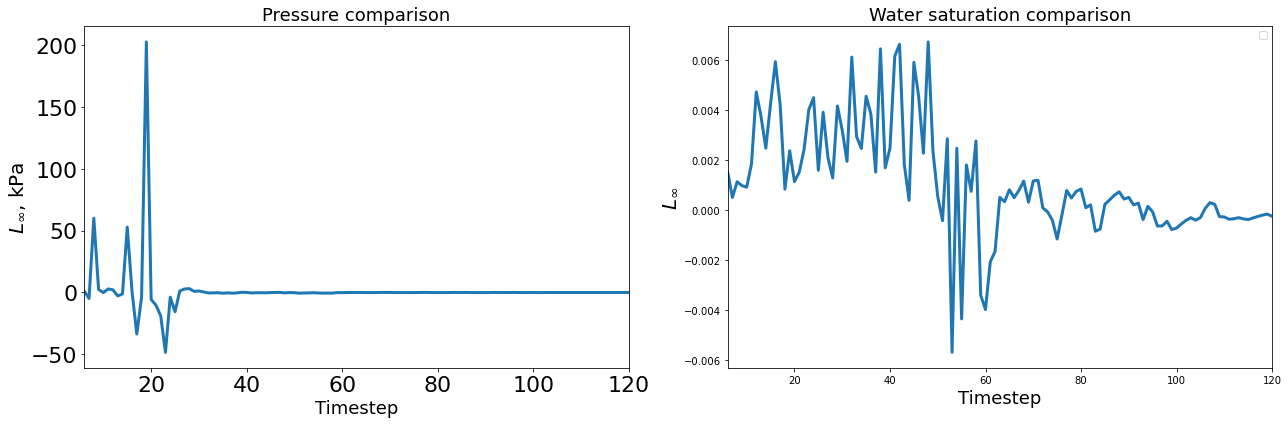

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.set_title('Pressure comparison', fontsize=18)
ax1.set_xlabel('Timestep', fontsize=18)
ax1.set_ylabel('$L_{\infty}$, kPa', fontsize=20)
ax1.set_xlim(6, 120)
plt.setp(ax1.get_xticklabels(), fontsize = 22)
plt.setp(ax1.get_yticklabels(), fontsize = 22)

ax1.plot(timeline, pressure_regr-pressure_extr, linewidth=3.0)

ax2.set_title('Water saturation comparison', fontsize=18)
ax2.plot(timeline, sat_wat_regr-sat_wat_extr, linewidth=3.0)
ax2.set_xlim(6, 120)
ax2.set_xlabel('Timestep', fontsize=18)
ax2.set_ylabel('$L_{\infty}$', fontsize=20)
ax2.legend()

fig.tight_layout()


In [32]:
def states(data_path):
    mat_contents = io.loadmat(data_path, squeeze_me=True)    
    states_struct = mat_contents['statesStepSol']
    pressure = np.stack(states_struct['pressure'])
    sat = np.stack(states_struct['s'])
    return pressure, sat

In [33]:
pressure_0, sat_0 = states('stepSol_0.mat')
pressure_2, sat_2 = states('stepSol_2.mat')

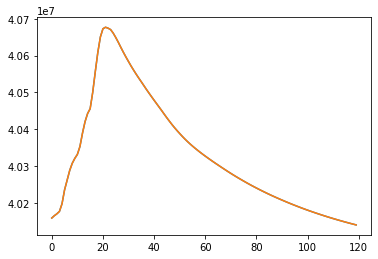

In [34]:
plt.plot(pressure_0.mean(1))
plt.plot(pressure_2.mean(1))

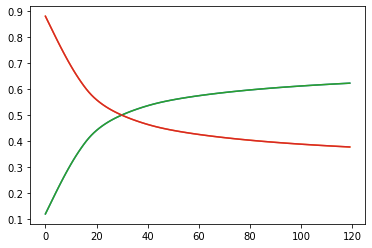

In [35]:
plt.plot(sat_0.mean(1))
plt.plot(sat_2.mean(1))

In [36]:
pressure_0.shape

(120, 18553)

In [37]:
coeffs_pressure.shape

(115,)

In [38]:
abs(linregression_iters - linextrapolate_iters) / linregression_iters * 100

array([0.0, 16.666666666666664, 60.0, 20.0, 20.0, 20.0, 20.0, 0.0, 20.0,
       0.0, 20.0, 0.0, 16.666666666666664, 20.0, 0.0, 0.0, 20.0, 0.0, 0.0,
       25.0, 25.0, 0.0, 0.0, 0.0, 33.33333333333333, 33.33333333333333,
       0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0,
       0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 100.0, 0.0, 100.0,
       0.0, 100.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 50.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0], dtype=object)

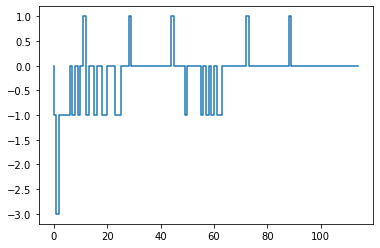

In [39]:
plt.plot(linregression_iters - linextrapolate_iters, drawstyle='steps')

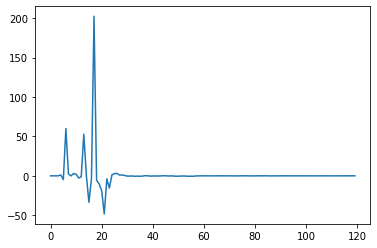

In [40]:
plt.plot(pressure_regr - pressure_extr)

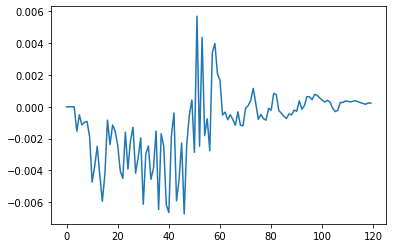

In [41]:
plt.plot(sat_wat_extr - sat_wat_regr)